# Transportation of mass and real counterfactual explanations

Results are produced by executing script **real.sh** and they are presented in Figure 7 and Table 2.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import glob
import json
from lib import utils
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set_context("paper", font_scale=4)

Set the variable *datas* to credit to plot the results for the *credit* dataset or *fico* for the *lending* dataset.
Set the variabl *k* to 160 for the *credit* dataset and 20 for the *lending* dataset.
Set *gamma* to 0.8580724846537919 for the *credit* dataset and 0.9746666325676951 for the *lending* dataset.

In [3]:
name="real"
datas="fico"
k=20
gamma=0.9746666325676951
final_df = []
cols = sns.color_palette("husl",n_colors=5)

In [4]:
# Read data
px = pd.read_csv('data/processed/'+datas+'_px.csv', index_col=0, header=0)
u = pd.read_csv('data/processed/'+datas+'_pyx.csv', index_col=0, names=["ID", "Probability"], header=0, dtype={'Probability': np.float})
vecs = pd.read_csv('data/processed/'+datas+'_vectors.csv', index_col=0, header=0)

For each feature value, compute the percentage of population with lower $P(y | x)$ values.

In [5]:
merged = pd.merge(px, u, left_index=True, right_index=True)
merged = merged.sort_values(by=['Probability'])
merged['Population']= merged['Population'].cumsum()-merged['Population']

Split the feature values in 10 classes depending on their $P(y|x)$ percentile.

In [6]:
limits=[0]
for per in np.arange(0.1, 1.0, 0.1):
    limits.append(merged['Probability'].loc[(merged['Population']>=per).idxmax()])

limits.append(1)

In [7]:
util_class = np.zeros(u.size, dtype=int)
for ind,lower in enumerate(limits[:-1]):
    indexes=u[(u['Probability']>=limits[ind]) & (u['Probability']<limits[ind+1])].index
    for i in indexes:
        util_class[i]=ind

u['Class']=list(util_class)

Plot transportation of mass for Algorithm 1.

In [8]:
# Read best-responses (det)
files = glob.glob("./outputs/{name}_greedydet_data_{datas}_k_{k}_a_2_*_config.json".format(name=name, datas=datas, k=k))
matrices = []
for fi in files:
    with open(fi,"r") as file:
        temp = json.load(file)
        best_responses = temp['best_responses']

        changed = {k:v for k,v in best_responses.items() if int(k)!=int(v)}
        effective_solution_set = np.unique(np.array([v for k,v in changed.items()]))
        movement_matrix = np.zeros((10, 10))
        for s, t in changed.items():
            source = int(s)
            target = int(t)
            movement_matrix[int(u.loc[source]['Class']),int(u.loc[target]['Class'])] += px.loc[source]['Population']
        matrices.append(movement_matrix)

matrices = np.array(matrices)
det_movement_matrix = np.mean(matrices,axis=0)

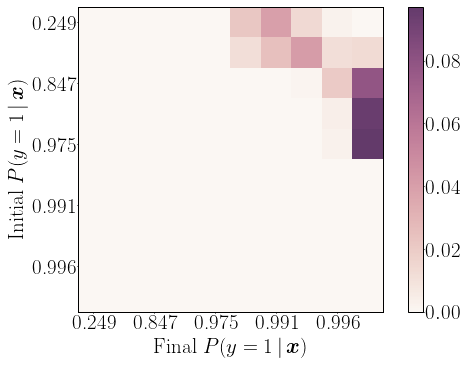

In [9]:
utils.latexify(8.8,5.5, font_scale=3.0)
my_cmap = sns.cubehelix_palette(light=0.97, dark=0.3, as_cmap=True)
plt.imshow(det_movement_matrix, cmap=my_cmap)
lab = range(0,10,2)
plt.xticks(ticks=lab,labels=[str(np.around(limits[l+1],3)) for l in lab])
plt.yticks(ticks=lab,labels=[str(np.around(limits[l+1],3)) for l in lab])
plt.xlabel('Final '+r'$P(y=1\,|\,\bm{x})$')
plt.ylabel('Initial '+r'$P(y=1\,|\,\bm{x})$')
plt.colorbar()

plt.savefig("./figures/movement_det_{datas}.pdf".format(datas=datas),bbox_inches='tight', )

Plot transportation of mass for Algorithm 2.

In [10]:
# Read best-responses (rand)
files = glob.glob("./outputs/{name}_greedyrand_data_{datas}_k_{k}_a_2_*_config.json".format(name=name, datas=datas, k=k))
matrices = []
for fi in files:
    with open(fi,"r") as file:
        temp = json.load(file)
        best_responses = temp['best_responses']

        changed = {k:v for k,v in best_responses.items() if int(k)!=int(v)}
        effective_solution_set = np.unique(np.array([v for k,v in changed.items()]))
        movement_matrix = np.zeros((10, 10))
        for s, t in changed.items():
            source = int(s)
            target = int(t)
            movement_matrix[int(u.loc[source]['Class']),int(u.loc[target]['Class'])] += px.loc[source]['Population']
        matrices.append(movement_matrix)

matrices = np.array(matrices)
rand_movement_matrix = np.mean(matrices,axis=0)

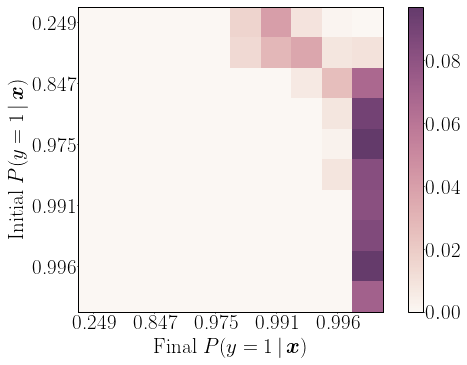

In [11]:
utils.latexify(8.8,5.5, font_scale=3.0)
my_cmap = sns.cubehelix_palette(light=0.97, dark=0.3, as_cmap=True)
plt.imshow(rand_movement_matrix, cmap=my_cmap)
lab = range(0,10,2)
plt.xticks(ticks=lab,labels=[str(np.around(limits[l+1],3)) for l in lab])
plt.yticks(ticks=lab,labels=[str(np.around(limits[l+1],3)) for l in lab])
plt.xlabel('Final '+r'$P(y=1\,|\,\bm{x})$')
plt.ylabel('Initial '+r'$P(y=1\,|\,\bm{x})$')
plt.colorbar()

plt.savefig("./figures/movement_rand_{datas}.pdf".format(datas=datas),bbox_inches='tight', )

Counterfactual explanation comparison between explanations of Minimum cost and Algorithm 1. 

In [ ]:
files = glob.glob("./outputs/{name}_mincost_data_{datas}_k_{k}_a_2_*_config.json".format(name=name, datas=datas, k=k))
for fi in files:
    with open(fi,"r") as file:
        temp = json.load(file)
        best_responses = temp['best_responses']
        changed_min = {k:v for k,v in best_responses.items() if int(k)!=int(v)}
        
files = glob.glob("./outputs/{name}_greedydet_data_{datas}_k_{k}_a_2_*_config.json".format(name=name, datas=datas, k=k))
for fi in files:
    with open(fi,"r") as file:
        temp = json.load(file)
        best_responses = temp['best_responses']
        changed_opt = {k:v for k,v in best_responses.items() if int(k)!=int(v)}

In [ ]:
comparison = {k:(v1,changed_opt[k]) for k,v1 in changed_min.items() if ((k in changed_opt) and (changed_opt[k]!=v1))}

In [ ]:
# rand_key = int(np.random.choice(list(comparison.keys())))
rand_key = 209 # used in the paper
print(rand_key)
print('****Current****')
print('****Probability = {pyx}****'.format(pyx=u.loc[rand_key]['Probability']))
print(vecs.loc[rand_key])
print('****Minimum****')
print('****Probability = {pyx}****'.format(pyx=u.loc[comparison[str(rand_key)][0]]['Probability']))
print(vecs.loc[comparison[str(rand_key)][0]])
print('****Optimal****')
print('****Probability = {pyx}****'.format(pyx=u.loc[comparison[str(rand_key)][1]]['Probability']))
print(vecs.loc[comparison[str(rand_key)][1]])